#Installing PyDrive

In [ ]:
!pip install -U -q PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



# After a specific amount of time Pydrive logs out, the enxt function checks for that and if it has happend trys log in again
# you will not to log in to your account just the first time, the next times it will be automatic, we will use this function later on.
def authorizeIfLoggedOut():
  try:
    file_list_GDrive = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()

  except:    
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)


## Importing modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:

# this will just check if we are logged out it logs in
authorizeIfLoggedOut()

file_list_GDrive = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()

for file1 in file_list_GDrive:  
    if "EETBS" in file1['title']:
        Folder_ID_Data_Driven_Building_Simulation= file1['id']

print(Folder_ID_Data_Driven_Building_Simulation)

file_list_Data_Driven_Building_Simulation = drive.ListFile({'q': "'%s' in parents and trashed=false" % Folder_ID_Data_Driven_Building_Simulation}).GetList()

for file2 in file_list_Data_Driven_Building_Simulation:  
    if "Data" in file2['title']:
        Folder_ID_Data= file2['id']
        
for file4 in file_list_Data_Driven_Building_Simulation:
  
    if "Figures" in file4['title']:
        Folder_ID_Figures= file4['id']        
        
        
file_list_Data = drive.ListFile({'q': "'%s' in parents and trashed=false" % Folder_ID_Data}).GetList()

for file3 in file_list_Data:  
    if "irradiance_2014_gen.csv" in file3['title']:
        print "irradiance_2014_gen.csv exists"
        ID_irradiance_2014_gen= file3['id']
        file_irradiance_2014_gen = drive.CreateFile({'id': ID_irradiance_2014_gen})
        file_irradiance_2014_gen.GetContentFile('irradiance_2014_gen.csv') 
    if "consumption_5545.csv" in file3['title']:
        print "consumption_5545.csv exists"
        ID_consumption_5545= file3['id']
        file_consumption_5545 = drive.CreateFile({'id': ID_consumption_5545})
        file_consumption_5545.GetContentFile('consumption_5545.csv') 
    if "Austin_weather_2014.csv" in file3['title']:
        print "Austin_weather_2014.csv exists"
        ID_Austin_weather_2014= file3['id']
        file_Austin_weather_2014 = drive.CreateFile({'id': ID_Austin_weather_2014})
        file_Austin_weather_2014.GetContentFile('Austin_weather_2014.csv') 

  

1caB1_U3vNNcNT6p9OE8ue7GbyOAxs2Oj
irradiance_2014_gen.csv exists
consumption_5545.csv exists
Austin_weather_2014.csv exists


In [ ]:
ConsumptionFileName= "consumption_5545.csv"
TemperatureFileName= "Austin_weather_2014.csv"
IrradianceFileName= "irradiance_2014_gen.csv"





#Begining of Week 9

##Importing consumption data

In [ ]:
DF_consumption = pd.read_csv(ConsumptionFileName,sep=",",index_col=0)

In [ ]:
DF_consumption.head()

,air conditioner_5545
2014-01-01 06:00:00,0.0
2014-01-01 07:00:00,0.0
2014-01-01 08:00:00,0.0
2014-01-01 09:00:00,0.0
2014-01-01 10:00:00,0.0


In [ ]:
DF_consumption.tail()

,air conditioner_5545
2014-12-31 01:00:00,NaN
2014-12-31 02:00:00,NaN
2014-12-31 03:00:00,NaN
2014-12-31 04:00:00,NaN
2014-12-31 05:00:00,NaN


In [ ]:
DF_consumption.head(10)

,air conditioner_5545
2014-01-01 06:00:00,0.0
2014-01-01 07:00:00,0.0
2014-01-01 08:00:00,0.0
2014-01-01 09:00:00,0.0
2014-01-01 10:00:00,0.0
2014-01-01 11:00:00,0.0
2014-01-01 12:00:00,0.0
2014-01-01 13:00:00,0.0
2014-01-01 14:00:00,0.0
2014-01-01 15:00:00,0.0


Parsing the dates:

In [ ]:
previousIndex = DF_consumption.index
previousIndex

Index([u'2014-01-01 06:00:00', u'2014-01-01 07:00:00', u'2014-01-01 08:00:00',
       u'2014-01-01 09:00:00', u'2014-01-01 10:00:00', u'2014-01-01 11:00:00',
       u'2014-01-01 12:00:00', u'2014-01-01 13:00:00', u'2014-01-01 14:00:00',
       u'2014-01-01 15:00:00',
       ...
       u'2014-12-30 20:00:00', u'2014-12-30 21:00:00', u'2014-12-30 22:00:00',
       u'2014-12-30 23:00:00', u'2014-12-31 00:00:00', u'2014-12-31 01:00:00',
       u'2014-12-31 02:00:00', u'2014-12-31 03:00:00', u'2014-12-31 04:00:00',
       u'2014-12-31 05:00:00'],
      dtype='object', length=8736)

We do not want strings, we want date/hours.

.to_datetime order:

In [ ]:
newParsedIndex = pd.to_datetime(previousIndex,utc=True)
newParsedIndex

DatetimeIndex(['2014-01-01 06:00:00+00:00', '2014-01-01 07:00:00+00:00',
               '2014-01-01 08:00:00+00:00', '2014-01-01 09:00:00+00:00',
               '2014-01-01 10:00:00+00:00', '2014-01-01 11:00:00+00:00',
               '2014-01-01 12:00:00+00:00', '2014-01-01 13:00:00+00:00',
               '2014-01-01 14:00:00+00:00', '2014-01-01 15:00:00+00:00',
               ...
               '2014-12-30 20:00:00+00:00', '2014-12-30 21:00:00+00:00',
               '2014-12-30 22:00:00+00:00', '2014-12-30 23:00:00+00:00',
               '2014-12-31 00:00:00+00:00', '2014-12-31 01:00:00+00:00',
               '2014-12-31 02:00:00+00:00', '2014-12-31 03:00:00+00:00',
               '2014-12-31 04:00:00+00:00', '2014-12-31 05:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=8736, freq=None)

In [ ]:
DF_consumption.index = newParsedIndex

Let's see if Pandas has understood that these indices are date and times, we can extract parts of this:

In [ ]:
DF_consumption.index.hour

Int64Index([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
            ...
            20, 21, 22, 23,  0,  1,  2,  3,  4,  5],
           dtype='int64', length=8736)

In [ ]:
DF_consumption.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', length=8736)

In [ ]:
DF_consumption.index.dayofweek #Monday is 0, so if we check the real calander, the first data is wednesday so the index is 2.

Int64Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
            ...
            1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
           dtype='int64', length=8736)

This is an index so I can also extract the corrosponding data:

In [ ]:
DF_consumption_someDaysInJuly = DF_consumption.loc["2014-07-01 00:00:00":"2014-07-03 00:00:00"]

In [ ]:
DF_consumption_someDaysInJuly.head(24)

,air conditioner_5545
2014-07-01 00:00:00+00:00,720.750000
2014-07-01 01:00:00+00:00,533.666667
2014-07-01 02:00:00+00:00,492.800000
2014-07-01 03:00:00+00:00,220.266667
2014-07-01 04:00:00+00:00,138.483333
2014-07-01 05:00:00+00:00,0.000000
2014-07-01 06:00:00+00:00,0.000000
2014-07-01 07:00:00+00:00,0.000000
2014-07-01 08:00:00+00:00,0.000000
2014-07-01 09:00:00+00:00,0.000000


##Plotting

Text(0,0.5,'Power')

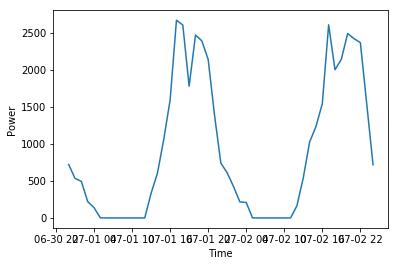

In [ ]:
fig1 = plt.figure()

plt.plot(DF_consumption_someDaysInJuly)
plt.xlabel("Time")
plt.ylabel("Power")

Text(0,0.5,'Power')

<Figure size 432x288 with 0 Axes>

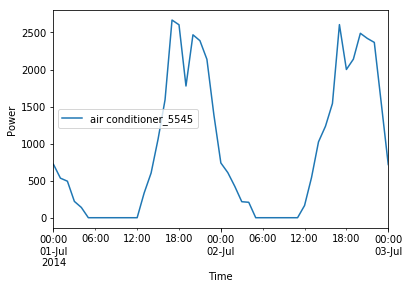

In [ ]:
fig2 = plt.figure()

DF_consumption_someDaysInJuly.plot()
plt.xlabel("Time")
plt.ylabel("Power")

##Importing weather data

In [1]:
DF_weather = pd.read_csv(TemperatureFileName,sep=";",index_col=0)

NameError: ignored

In [ ]:
DF_weather.head(10)

,latitude,longitude,tz_offset,summary,ozone,ozone_error,temperature,temperature_error,dew_point,dew_point_error,...,pressure_error,wind_speed,wind_speed_error,cloud_cover,cloud_cover_error,wind_bearing,precip_intensity,precip_intensity_error,precip_probability,precip_type
localhour,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00-06,30.292432,-97.699662,-6,Clear,NaN,NaN,40.36,NaN,30.12,NaN,...,NaN,5.00,NaN,0.00,NaN,200.0,0.0,NaN,0.0,NaN
2014-01-01 01:00:00-06,30.292432,-97.699662,-6,Clear,NaN,NaN,38.11,NaN,30.46,NaN,...,NaN,5.60,NaN,0.00,NaN,196.0,0.0,NaN,0.0,NaN
2014-01-01 02:00:00-06,30.292432,-97.699662,-6,Clear,NaN,NaN,38.65,NaN,31.92,NaN,...,NaN,3.96,NaN,0.00,NaN,191.0,0.0,NaN,0.0,NaN
2014-01-01 03:00:00-06,30.292432,-97.699662,-6,Clear,NaN,NaN,38.47,NaN,30.99,NaN,...,NaN,3.11,NaN,0.00,NaN,184.0,0.0,NaN,0.0,NaN
2014-01-01 04:00:00-06,30.292432,-97.699662,-6,Clear,NaN,NaN,38.00,NaN,30.66,NaN,...,NaN,5.33,NaN,0.00,NaN,190.0,0.0,NaN,0.0,NaN
2014-01-01 05:00:00-06,30.292432,-97.699662,-6,Clear,NaN,NaN,38.85,NaN,30.81,NaN,...,NaN,5.54,NaN,0.00,NaN,176.0,0.0,NaN,0.0,NaN
2014-01-01 06:00:00-06,30.292432,-97.699662,-6,Partly Cloudy,NaN,NaN,39.36,NaN,30.41,NaN,...,NaN,4.67,NaN,0.55,NaN,196.0,0.0,NaN,0.0,NaN
2014-01-01 07:00:00-06,30.292432,-97.699662,-6,Clear,NaN,NaN,37.86,NaN,30.52,NaN,...,NaN,4.16,NaN,0.00,NaN,201.0,0.0,NaN,0.0,NaN
2014-01-01 08:00:00-06,30.292432,-97.699662,-6,Clear,NaN,NaN,38.97,NaN,31.02,NaN,...,NaN,6.01,NaN,0.00,NaN,199.0,0.0,NaN,0.0,NaN


In [ ]:
previousIndex_weather = DF_weather.index
newParsedIndex_weather = pd.to_datetime(previousIndex_weather)
DF_weather.index = newParsedIndex_weather

##How to extract a column?

In [ ]:
DF_weather.columns

Index([u'latitude', u'longitude', u'tz_offset', u'summary', u'ozone',
       u'ozone_error', u'temperature', u'temperature_error', u'dew_point',
       u'dew_point_error', u'humidity', u'humidity_error', u'visibility',
       u'visibility_error', u'apparent_temperature',
       u'apparent_temperature_error', u'pressure', u'pressure_error',
       u'wind_speed', u'wind_speed_error', u'cloud_cover',
       u'cloud_cover_error', u'wind_bearing', u'precip_intensity',
       u'precip_intensity_error', u'precip_probability', u'precip_type'],
      dtype='object')

We are intereseted at temperature to be extracted:

In [ ]:
Series_temperature = DF_weather["temperature"]

In [ ]:
Series_temperature.head(10)

localhour
2014-01-01 00:00:00-06:00    40.36
2014-01-01 01:00:00-06:00    38.11
2014-01-01 02:00:00-06:00    38.65
2014-01-01 03:00:00-06:00    38.47
2014-01-01 04:00:00-06:00    38.00
2014-01-01 05:00:00-06:00    38.85
2014-01-01 06:00:00-06:00    39.36
2014-01-01 07:00:00-06:00    37.86
2014-01-01 08:00:00-06:00    38.97
2014-01-01 09:00:00-06:00    45.85
Name: temperature, dtype: float64

But these are series, not data frame. To build data frame:

In [ ]:
DF_temperature = DF_weather[["temperature"]]
DF_temperature.head()

,temperature
localhour,
2014-01-01 00:00:00-06:00,40.36
2014-01-01 01:00:00-06:00,38.11
2014-01-01 02:00:00-06:00,38.65
2014-01-01 03:00:00-06:00,38.47
2014-01-01 04:00:00-06:00,38.00


In [ ]:
DF_temperature.head(10)

,temperature
localhour,
2014-01-01 00:00:00-06:00,40.36
2014-01-01 01:00:00-06:00,38.11
2014-01-01 02:00:00-06:00,38.65
2014-01-01 03:00:00-06:00,38.47
2014-01-01 04:00:00-06:00,38.00
2014-01-01 05:00:00-06:00,38.85
2014-01-01 06:00:00-06:00,39.36
2014-01-01 07:00:00-06:00,37.86
2014-01-01 08:00:00-06:00,38.97


##Importing PV generation to estimate radiation

In [ ]:
DF_irradianceSource = pd.read_csv(IrradianceFileName,sep=";")
DF_irradianceSource.head()

,dataid,localhour,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
0,8236,2014-01-01 00:00:00,0.303150,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.051567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8236,2014-01-01 01:00:00,0.358567,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.013417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8236,2014-01-01 02:00:00,0.367283,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.016283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8236,2014-01-01 03:00:00,0.350333,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.025300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8236,2014-01-01 04:00:00,0.562517,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.029950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
DF_irradianceSource = pd.read_csv(IrradianceFileName,sep=";",index_col=1)
DF_irradianceSource.head()

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
localhour,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,8236,0.303150,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0051,...,0.051567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,8236,0.358567,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,...,0.013417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:00:00,8236,0.367283,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,...,0.016283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 03:00:00,8236,0.350333,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,...,0.025300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 04:00:00,8236,0.562517,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,...,0.029950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
previousIndex_irradiance = DF_irradiance.index
newParsedIndex_irradiance = pd.to_datetime(previousIndex_irradiance,utc=True)
DF_irradiance.index = newParsedIndex_irradiance

In [ ]:
DF_irradianceSource.columns

Index([u'dataid', u'use', u'air1', u'air2', u'air3', u'airwindowunit1',
       u'aquarium1', u'bathroom1', u'bathroom2', u'bedroom1', u'bedroom2',
       u'bedroom3', u'bedroom4', u'bedroom5', u'car1', u'clotheswasher1',
       u'clotheswasher_dryg1', u'diningroom1', u'diningroom2', u'dishwasher1',
       u'disposal1', u'drye1', u'dryg1', u'freezer1', u'furnace1', u'furnace2',
       u'garage1', u'garage2', u'gen', u'grid', u'heater1', u'housefan1',
       u'icemaker1', u'jacuzzi1', u'kitchen1', u'kitchen2', u'kitchenapp1',
       u'kitchenapp2', u'lights_plugs1', u'lights_plugs2', u'lights_plugs3',
       u'lights_plugs4', u'lights_plugs5', u'lights_plugs6', u'livingroom1',
       u'livingroom2', u'microwave1', u'office1', u'outsidelights_plugs1',
       u'outsidelights_plugs2', u'oven1', u'oven2', u'pool1', u'pool2',
       u'poollight1', u'poolpump1', u'pump1', u'range1', u'refrigerator1',
       u'refrigerator2', u'security1', u'shed1', u'sprinkler1',
       u'utilityroom1', u'vent

We need the "gen" column:

In [ ]:
DF_irradiance = DF_irradianceSource[["gen"]]
DF_irradiance.head(24)

,gen
localhour,
2014-01-01 00:00:00,-0.005967
2014-01-01 01:00:00,-0.006317
2014-01-01 02:00:00,-0.006350
2014-01-01 03:00:00,-0.006267
2014-01-01 04:00:00,-0.006767
2014-01-01 05:00:00,-0.006750
2014-01-01 06:00:00,-0.006500
2014-01-01 07:00:00,0.052800
2014-01-01 08:00:00,0.773583


The negative numbers means the error. In fact, the irradiation is 0 and we must consider them as 0 in our calculations:

In [ ]:
i = DF_irradiance["gen"]<0

DF_irradiance.loc[DF_irradiance["gen"]<0] = 0
DF_irradiance.head(24)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,gen
localhour,
2014-01-01 00:00:00,0.000000
2014-01-01 01:00:00,0.000000
2014-01-01 02:00:00,0.000000
2014-01-01 03:00:00,0.000000
2014-01-01 04:00:00,0.000000
2014-01-01 05:00:00,0.000000
2014-01-01 06:00:00,0.000000
2014-01-01 07:00:00,0.052800
2014-01-01 08:00:00,0.773583


##Joining the datasets

Doing later...

##Adding the seasonality related parameter and lagged values

In [ ]:
DF_consumption.index

DatetimeIndex(['2014-01-01 06:00:00+00:00', '2014-01-01 07:00:00+00:00',
               '2014-01-01 08:00:00+00:00', '2014-01-01 09:00:00+00:00',
               '2014-01-01 10:00:00+00:00', '2014-01-01 11:00:00+00:00',
               '2014-01-01 12:00:00+00:00', '2014-01-01 13:00:00+00:00',
               '2014-01-01 14:00:00+00:00', '2014-01-01 15:00:00+00:00',
               ...
               '2014-12-30 20:00:00+00:00', '2014-12-30 21:00:00+00:00',
               '2014-12-30 22:00:00+00:00', '2014-12-30 23:00:00+00:00',
               '2014-12-31 00:00:00+00:00', '2014-12-31 01:00:00+00:00',
               '2014-12-31 02:00:00+00:00', '2014-12-31 03:00:00+00:00',
               '2014-12-31 04:00:00+00:00', '2014-12-31 05:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=8736, freq=None)

In [ ]:
DF_consumption.loc["2014-07-01 00:00:00":"2014-07-03 23:00:00"]

,air conditioner_5545
2014-07-01 00:00:00+00:00,720.750000
2014-07-01 01:00:00+00:00,533.666667
2014-07-01 02:00:00+00:00,492.800000
2014-07-01 03:00:00+00:00,220.266667
2014-07-01 04:00:00+00:00,138.483333
2014-07-01 05:00:00+00:00,0.000000
2014-07-01 06:00:00+00:00,0.000000
2014-07-01 07:00:00+00:00,0.000000
2014-07-01 08:00:00+00:00,0.000000
2014-07-01 09:00:00+00:00,0.000000


Using "shift" function to put the load for an hour, for the future one in order to PREDICT:

In [ ]:
DF_consumption["air conditioner_5545 - 1"] = DF_consumption["air conditioner_5545"].shift(1)
DF_consumption.loc["2014-07-01 00:00:00":"2014-07-03 23:00:00"]

,air conditioner_5545,air conditioner_5545 - 1
2014-07-01 00:00:00+00:00,720.750000,1261.683333
2014-07-01 01:00:00+00:00,533.666667,720.750000
2014-07-01 02:00:00+00:00,492.800000,533.666667
2014-07-01 03:00:00+00:00,220.266667,492.800000
2014-07-01 04:00:00+00:00,138.483333,220.266667
2014-07-01 05:00:00+00:00,0.000000,138.483333
2014-07-01 06:00:00+00:00,0.000000,0.000000
2014-07-01 07:00:00+00:00,0.000000,0.000000
2014-07-01 08:00:00+00:00,0.000000,0.000000
2014-07-01 09:00:00+00:00,0.000000,0.000000


Renaming columns as they are ugly:

In [ ]:
DF_consumption = DF_consumption.rename(columns={"air conditioner_5545":"AC consumption","air conditioner_5545 - 1":"AC consumption - 1"})

NOTE: "rename" is not an inplace function. It means that it does not automatically change the original data frame. We must assign:

DF_consumption = DF_consumption.rename(....)

In [ ]:
DF_consumption.loc["2014-07-01 00:00:00":"2014-07-03 23:00:00"]

,AC consumption,AC consumption - 1
2014-07-01 00:00:00+00:00,720.750000,1261.683333
2014-07-01 01:00:00+00:00,533.666667,720.750000
2014-07-01 02:00:00+00:00,492.800000,533.666667
2014-07-01 03:00:00+00:00,220.266667,492.800000
2014-07-01 04:00:00+00:00,138.483333,220.266667
2014-07-01 05:00:00+00:00,0.000000,138.483333
2014-07-01 06:00:00+00:00,0.000000,0.000000
2014-07-01 07:00:00+00:00,0.000000,0.000000
2014-07-01 08:00:00+00:00,0.000000,0.000000
2014-07-01 09:00:00+00:00,0.000000,0.000000


In [ ]:
DF_consumption["AC consumption - 2"] = DF_consumption["AC consumption"].shift(2)
DF_consumption["AC consumption - 3"] = DF_consumption["AC consumption"].shift(3)
DF_consumption["AC consumption - 4"] = DF_consumption["AC consumption"].shift(4)
DF_consumption["AC consumption - 5"] = DF_consumption["AC consumption"].shift(5)
DF_consumption["AC consumption - 6"] = DF_consumption["AC consumption"].shift(6)
DF_consumption["AC consumption - 7"] = DF_consumption["AC consumption"].shift(7)
DF_consumption.loc["2014-07-01 00:00:00":"2014-07-03 23:00:00"]

,AC consumption,AC consumption - 1,AC consumption - 2,AC consumption - 3,AC consumption - 4,AC consumption - 5,AC consumption - 6,AC consumption - 7
2014-07-01 00:00:00+00:00,720.750000,1261.683333,2027.666667,2353.850000,2422.050000,1712.333333,2588.133333,1236.983333
2014-07-01 01:00:00+00:00,533.666667,720.750000,1261.683333,2027.666667,2353.850000,2422.050000,1712.333333,2588.133333
2014-07-01 02:00:00+00:00,492.800000,533.666667,720.750000,1261.683333,2027.666667,2353.850000,2422.050000,1712.333333
2014-07-01 03:00:00+00:00,220.266667,492.800000,533.666667,720.750000,1261.683333,2027.666667,2353.850000,2422.050000
2014-07-01 04:00:00+00:00,138.483333,220.266667,492.800000,533.666667,720.750000,1261.683333,2027.666667,2353.850000
2014-07-01 05:00:00+00:00,0.000000,138.483333,220.266667,492.800000,533.666667,720.750000,1261.683333,2027.666667
2014-07-01 06:00:00+00:00,0.000000,0.000000,138.483333,220.266667,492.800000,533.666667,720.750000,1261.683333
2014-07-01 07:00:00+00:00,0.000000,0.000000,0.000000,138.483333,220.266667,492.800000,533.666667,720.750000
2014-07-01 08:00:00+00:00,0.000000,0.000000,0.000000,0.000000,138.483333,220.266667,492.800000,533.666667
2014-07-01 09:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,138.483333,220.266667,492.800000


##Assignment 9:

A)
* Plot the consumption profile for July 10th between 8 AM to 9 PM.
* Do the same for the temperature and irradiance profiles in subplots.

B)
* Define new columns in the consumption dataset each of which represents a time related feature (you can check on Pandas guidlines for these parameters: hour, dayOfWeek, month, weekOfYear, and define a column calld "weekend flag" (with valu 0: weekday and 1: weekend))

In [ ]:
DF_consumption.index.hour

Int64Index([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
            ...
            20, 21, 22, 23,  0,  1,  2,  3,  4,  5],
           dtype='int64', length=8736)

Hint:

In [ ]:
DF_consumption["hour"] = DF_consumption.index.hour
DF_consumption.head()

,AC consumption,AC consumption - 1,AC consumption - 2,AC consumption - 3,AC consumption - 4,AC consumption - 5,AC consumption - 6,AC consumption - 7,hour
2014-01-01 06:00:00+00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
2014-01-01 07:00:00+00:00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7
2014-01-01 08:00:00+00:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,8
2014-01-01 09:00:00+00:00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,9
2014-01-01 10:00:00+00:00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,10
